# Data Preprocessing and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
train_data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [8]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Preprocessing

## Check for duplicate values
- If present then drop

In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data.drop_duplicates(inplace = True)         # To drop duplicate values if present

## Dealing with null values

In [12]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### If number of missing values is large wrt total values then dropping the column is the suitable strategy

In [13]:
titanic = train_data.drop('Cabin', axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### In numerical columns missing values can be replaced by mean or median of that column

In [14]:
avg_age = titanic.Age.mean()
titanic.Age.replace(np.nan, avg_age, inplace = True)

In [15]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### In Categorical columns misssing values can be replaced by the mode of that column

In [16]:
freq_port = titanic.Embarked.dropna().mode()[0]
titanic.replace(np.nan, freq_port, inplace = True)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Some other steps to prepare dataset for modelling
- Taking care of categorical columns
- Standardization
- Binning / Creating bands
- Splitting
- Transformations

# --------------------------------------------------------------------------------------
# Exploratory Data Analysis

1. **Univariate** : One Variable / Column / Feature
2. **Bivariate**      : Two Variables/ columns/ Features

In [96]:
sns.set(rc = {'axes.facecolor' : 'white', 
              'axes.grid' : False,
              'axes.labelsize'  : 14, 
              'axes.labelcolor' : 'black',
              'axes.titlesize'  : 16,
              'axes.titlecolor' : 'black',
              'xtick.labelsize' : 12,
              'xtick.color': 'black',
              'ytick.labelsize' : 12,
              'ytick.color' : 'black',
              'figure.facecolor': 'white'
             })

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

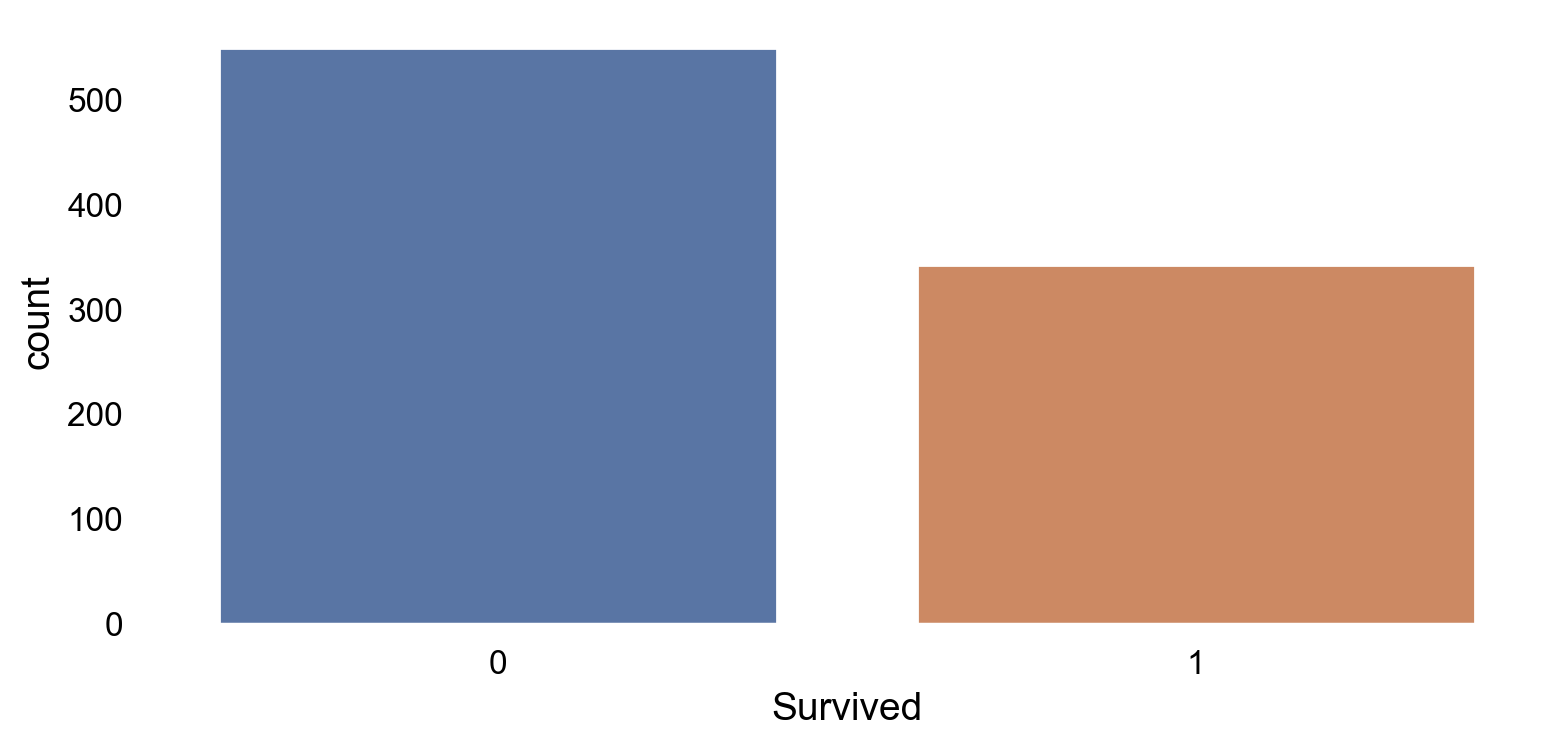

In [26]:
# To compare dead and survived
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Survived', data = titanic)

In [27]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
survival_data = titanic.Survived.value_counts(normalize = True)

In [34]:
print('Percentage of survivors : ', survival_data[1]*100, '%')
print('Percentage of dead      : ', survival_data[0]*100, '%')

Percentage of survivors :  38.38383838383838 %
Percentage of dead      :  61.61616161616161 %


C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

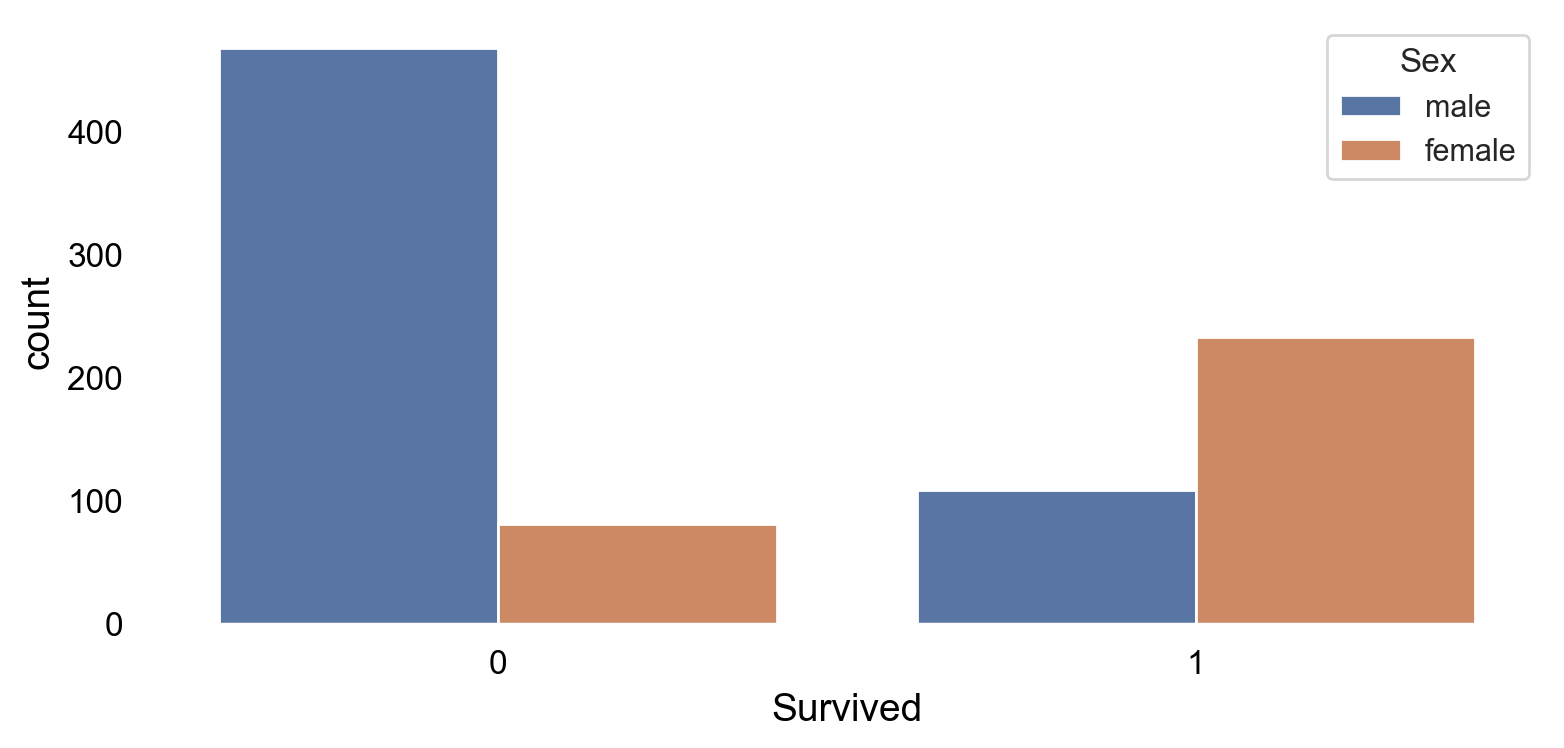

In [40]:
# To compare dead and survived wrt Sex
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Survived',hue = 'Sex', data = titanic)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

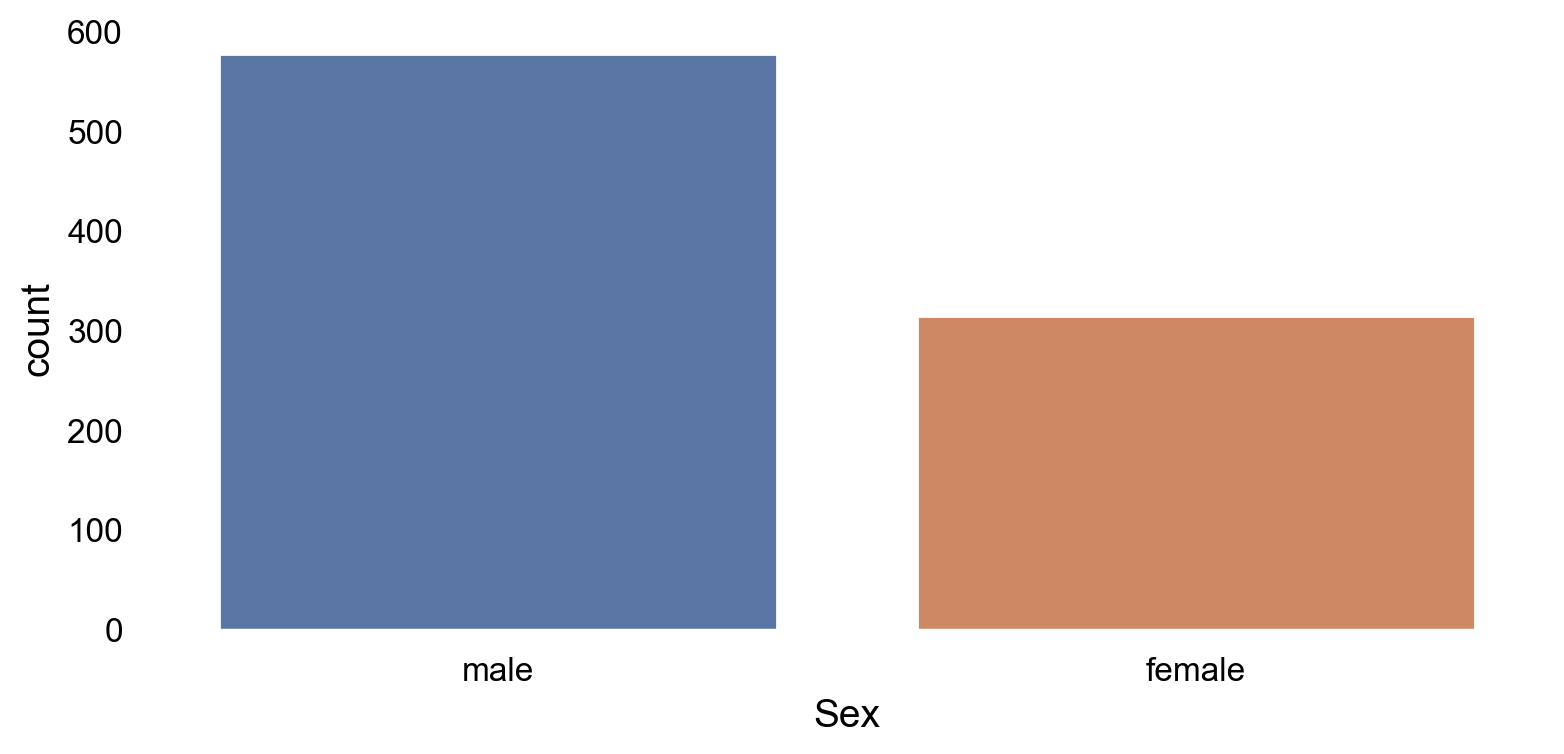

In [41]:
# Male and Female Travellers
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Sex', data = titanic)

In [45]:
# Calculating the survival percentages for males and females
male_female = titanic.Sex.value_counts()
male_female

male      577
female    314
Name: Sex, dtype: int64

In [51]:
male_survivors = len(titanic[(titanic.Sex == 'male') & (titanic.Survived == 1)])
male_survivors

109

In [52]:
female_survivors = len(titanic[(titanic.Sex == 'female') & (titanic.Survived == 1)])
female_survivors

233

In [54]:
male_survival_rate   = (male_survivors / male_female['male']) * 100
female_survival_rate = (female_survivors / male_female['female']) * 100
print('Percentage of Male Survivors   : ',male_survival_rate)
print('Percentage of Female Survivors : ',female_survival_rate)

Percentage of Male Survivors   :  18.890814558058924
Percentage of Female Survivors :  74.20382165605095


In [56]:
# Method three
male_svl_data = titanic[titanic.Sex == 'male']['Survived']
male_svl_rate = sum(male_svl_data) / len(male_svl_data) * 100

female_svl_data = titanic[titanic.Sex == 'female']['Survived']
female_svl_rate = sum(female_svl_data) / len(female_svl_data) * 100

print('Percentage of Male Survivors   : ',male_svl_rate)
print('Percentage of Female Survivors : ',female_svl_rate)

Percentage of Male Survivors   :  18.890814558058924
Percentage of Female Survivors :  74.20382165605095


In [62]:
titanic.groupby('Sex')['Survived'].value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [64]:
# Method 3
svl_rate = titanic.groupby('Sex')['Survived'].value_counts(normalize = True)

print('Percentage of Female Survivors     : ', svl_rate[0]*100)
print('Percentage of Female Non-Survivors : ', svl_rate[1]*100)
print('Percentage of Male Survivors       : ', svl_rate[3]*100)
print('Percentage of Males Non-Survivors  : ', svl_rate[2]*100)

Percentage of Female Survivors     :  74.20382165605095
Percentage of Female Non-Survivors :  25.796178343949045
Percentage of Male Survivors       :  18.890814558058924
Percentage of Males Non-Survivors  :  81.10918544194108


C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

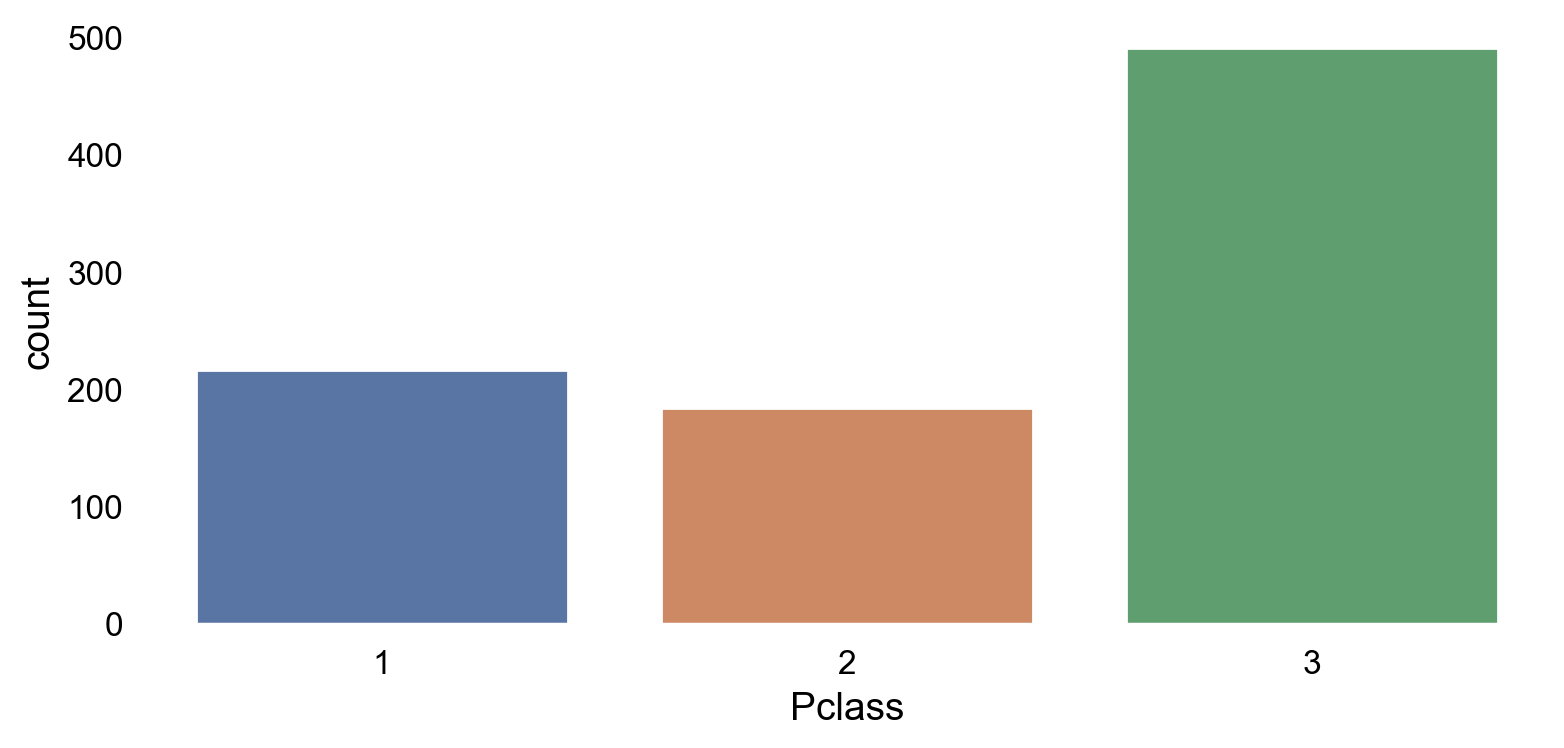

In [65]:
# Travellers is passenger classes
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Pclass', data = titanic)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

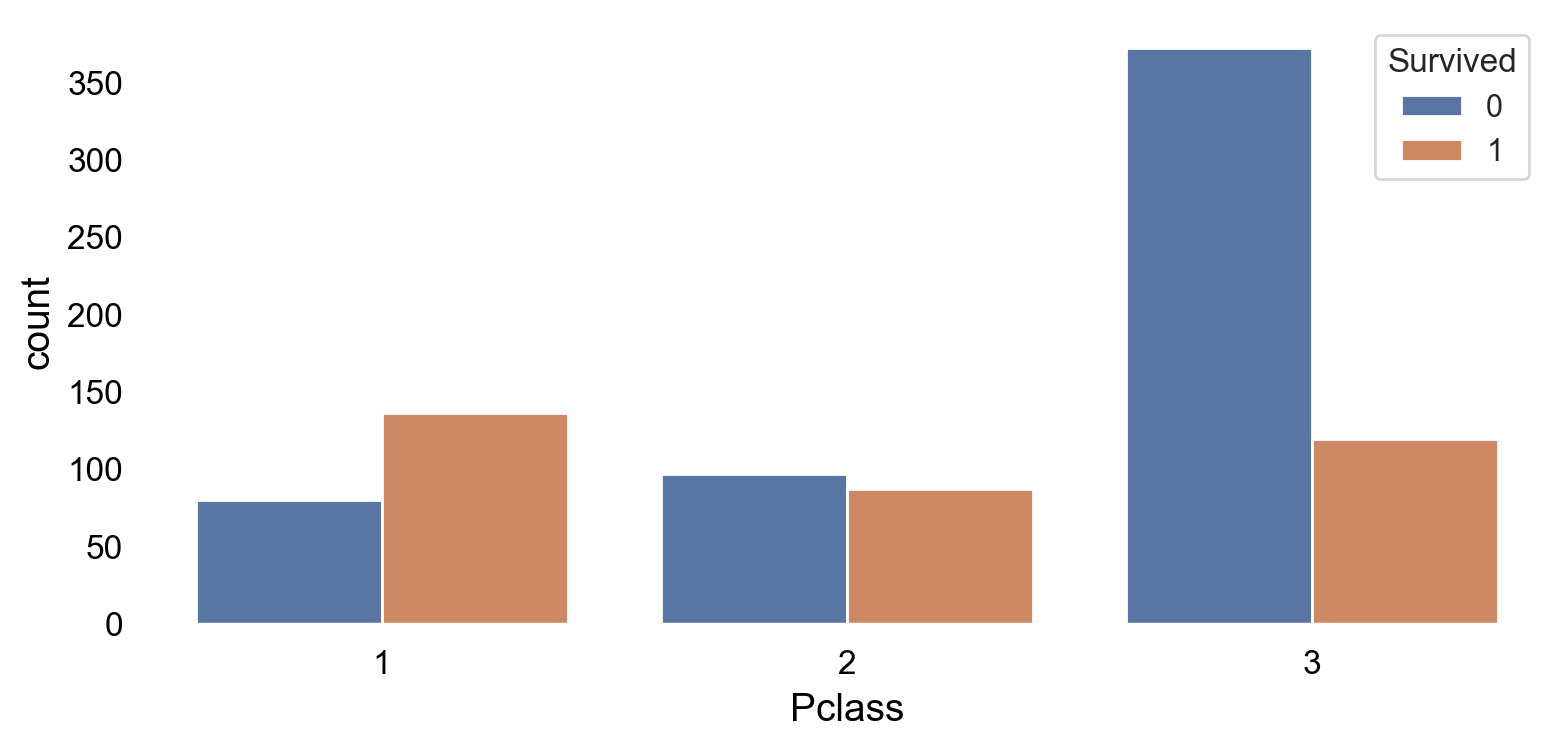

In [67]:
# Survival based on passenger class
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Pclass',hue = 'Survived', data = titanic)

In [68]:
titanic.groupby('Pclass')['Survived'].value_counts(normalize = True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [76]:
svl_rate = titanic.groupby('Pclass')['Survived'].value_counts(normalize = True)

print('Percentage of 1st Passenger Class Survivors     : ', svl_rate[1][1]*100)
print('Percentage of 1st Passenger Class Non-Survivors : ', svl_rate[1][0]*100)
print('Percentage of 2nd Passenger Class Survivors     : ', svl_rate[2][1]*100)
print('Percentage of 2nd Passenger Class Non-Survivors : ', svl_rate[2][0]*100)
print('Percentage of 3rd Passenger Class Survivors     : ', svl_rate[3][1]*100)
print('Percentage of 3rd Passenger Class Non-Survivors : ', svl_rate[3][0]*100)

Percentage of 1st Passenger Class Survivors     :  62.96296296296296
Percentage of 1st Passenger Class Non-Survivors :  37.03703703703704
Percentage of 2nd Passenger Class Survivors     :  47.28260869565217
Percentage of 2nd Passenger Class Non-Survivors :  52.71739130434783
Percentage of 3rd Passenger Class Survivors     :  24.236252545824847
Percentage of 3rd Passenger Class Non-Survivors :  75.76374745417516


([<matplotlib.patches.Wedge at 0x1c24daf4df0>,
 [Text(0.10974669157197077, 1.0945116096638752, 'Class1'),
  Text(-0.6797274752124207, -0.864852912026865, 'Class2'),
  Text(0.9283540225678141, -0.5900498358462265, 'Class3')],
 [Text(0.0598618317665295, 0.5970063325439318, '46.8%'),
  Text(-0.37076044102495676, -0.4717379520146535, '35.2%'),
  Text(0.5063749214006258, -0.3218453650070326, '18.0%')])

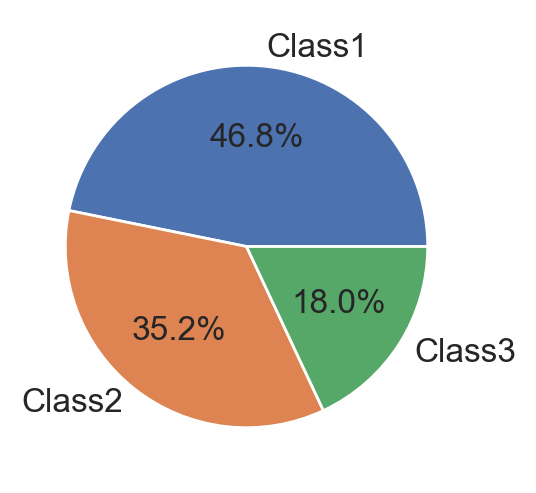

In [78]:
pclass_svl = [svl_rate[1][1],svl_rate[2][1],svl_rate[3][1]]
plt.figure(figsize = (9,3), dpi = 200)
plt.pie(pclass_svl, labels = ['Class1','Class2','Class3'], autopct = '%1.1f%%')

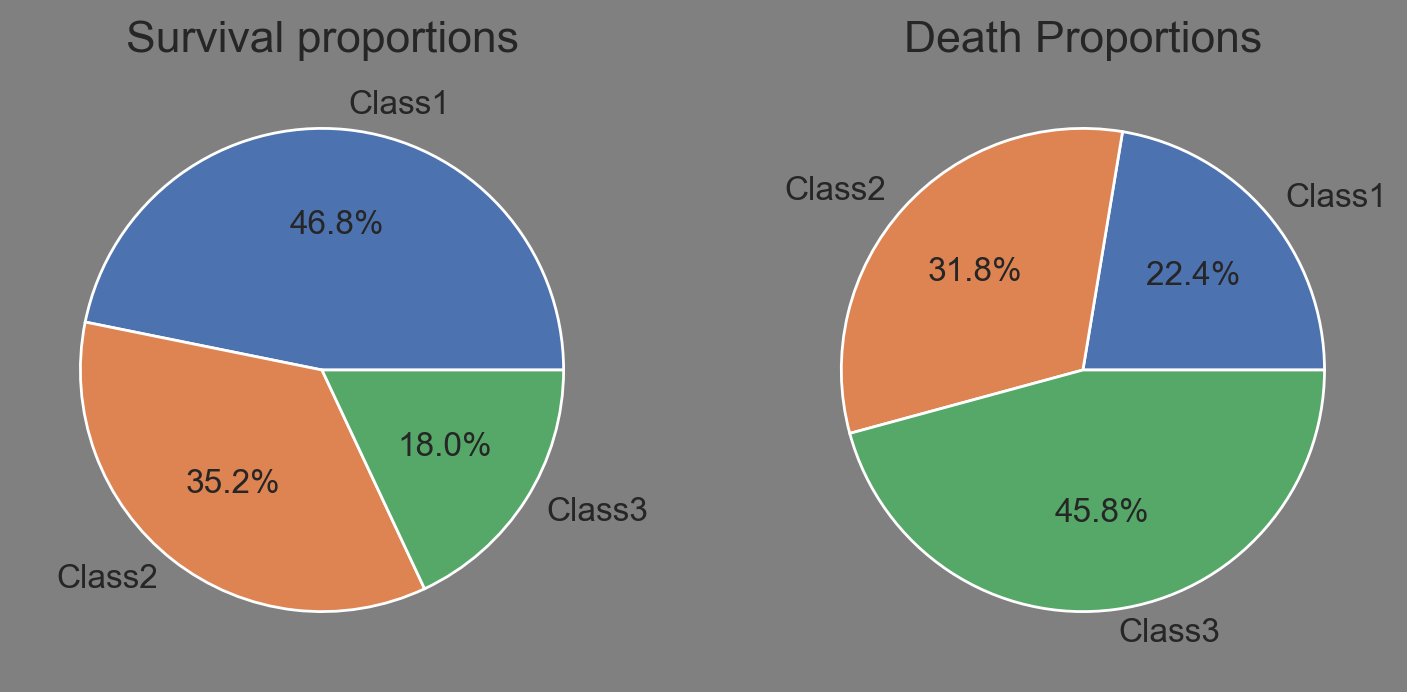

In [97]:
fig = plt.figure(figsize = (9,4), dpi = 200, facecolor = 'gray')
p1 = fig.add_subplot(1,2,1)
p2 = fig.add_subplot(1,2,2)

pclass_svl = [svl_rate[1][1],svl_rate[2][1],svl_rate[3][1]]
pclass_non_svl = [svl_rate[1][0],svl_rate[2][0],svl_rate[3][0]]

classes = ['Class1','Class2','Class3']

p1.pie(pclass_svl, labels = classes, autopct = '%1.1f%%')
p2.pie(pclass_non_svl, labels = classes, autopct = '%1.1f%%')
p1.title.set_text('Survival proportions')
p2.title.set_text('Death Proportions')

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

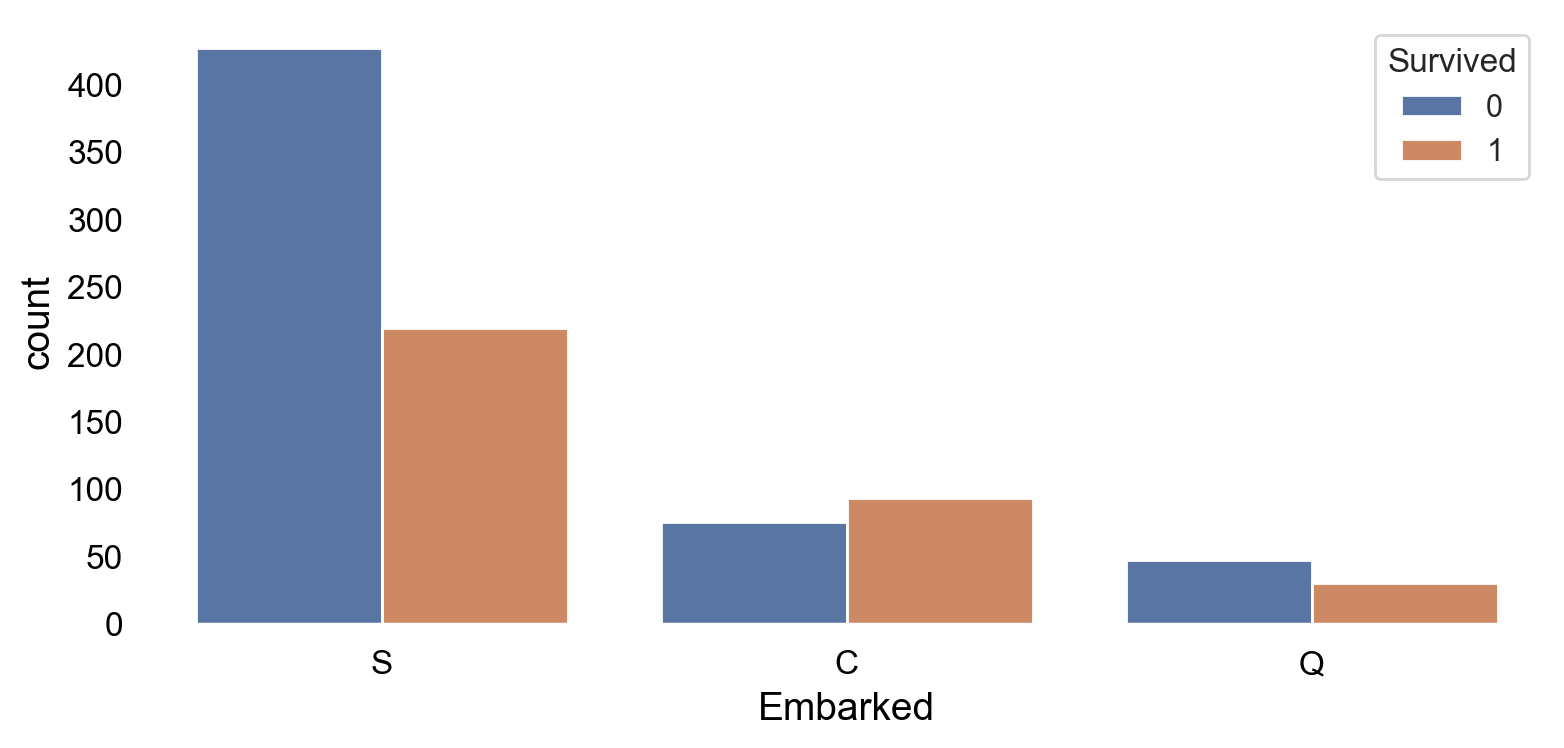

In [84]:
# Survival based on passenger class
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Embarked',hue = 'Survived', data = titanic)

In [85]:
titanic.groupby('Embarked')['Survived'].value_counts(normalize = True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

In [99]:
titanic[['Fare','Age']].describe()

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.699118
std,49.693429,13.002015
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
max,512.329200,80.000000


C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

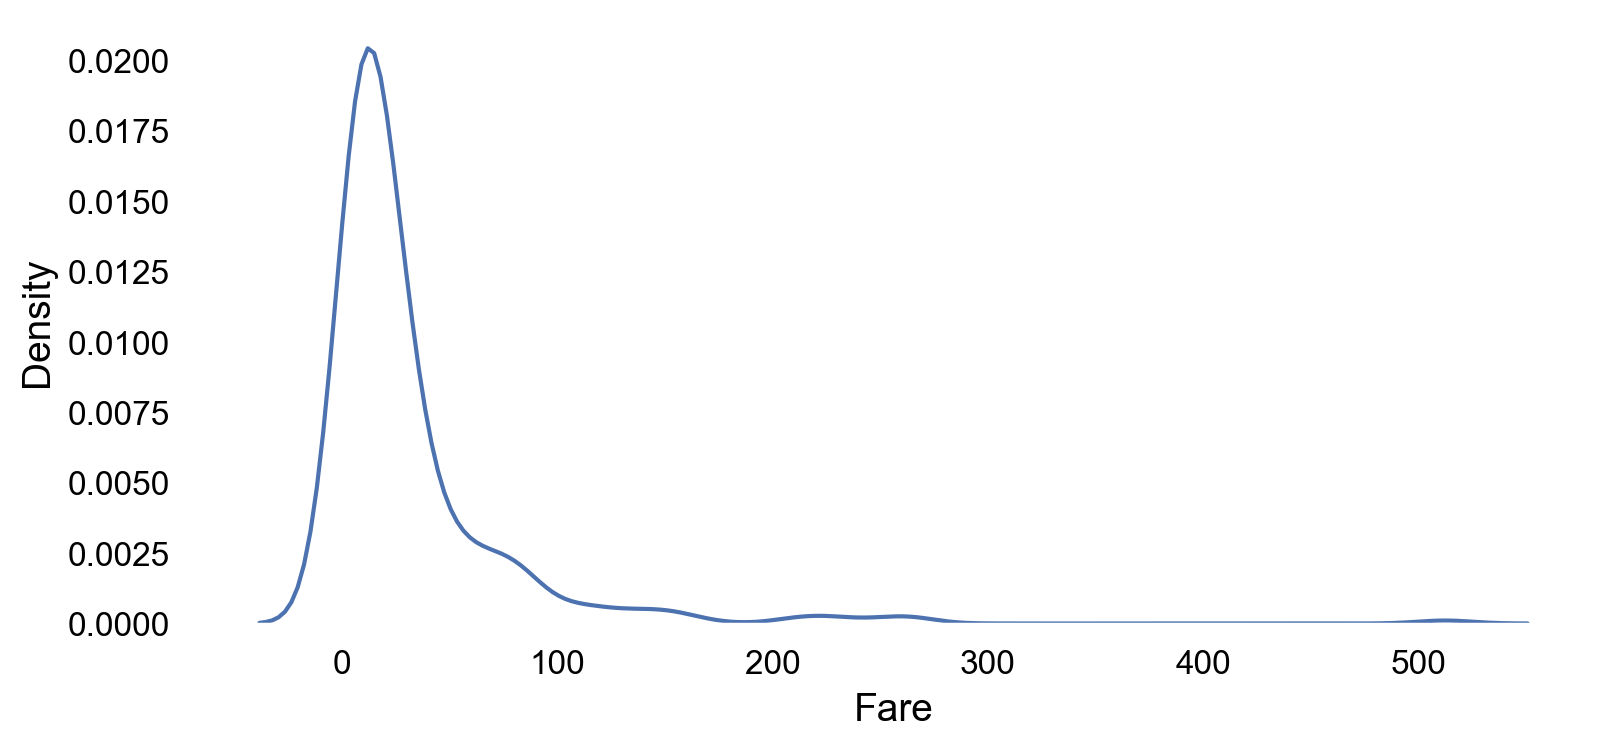

In [112]:
plt.figure(figsize = (9,4), dpi = 200)
sns.distplot(titanic.Fare, hist = False)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

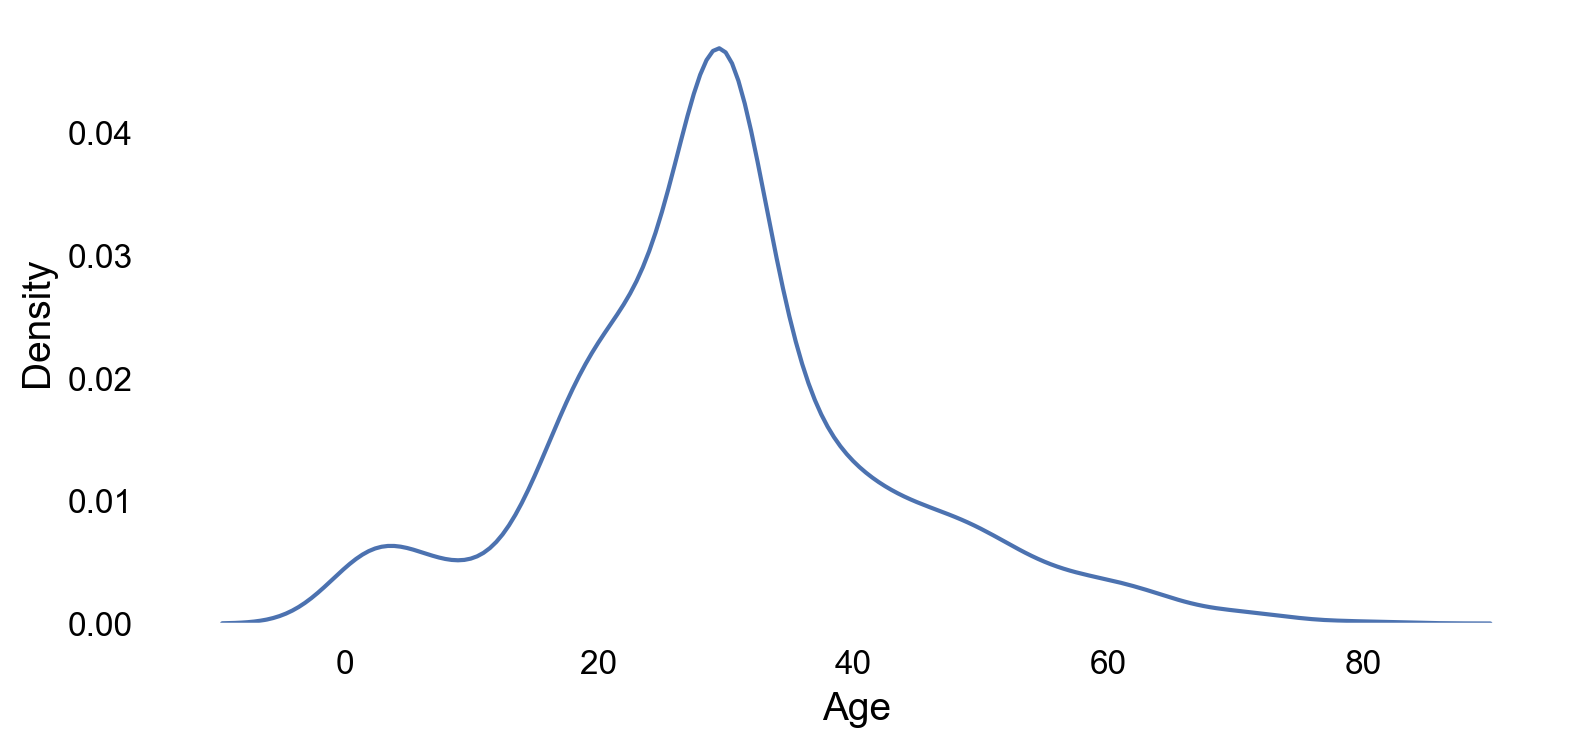

In [113]:
plt.figure(figsize = (9,4), dpi = 200)
sns.distplot(titanic.Age, hist = False)

<AxesSubplot:ylabel='Fare'>

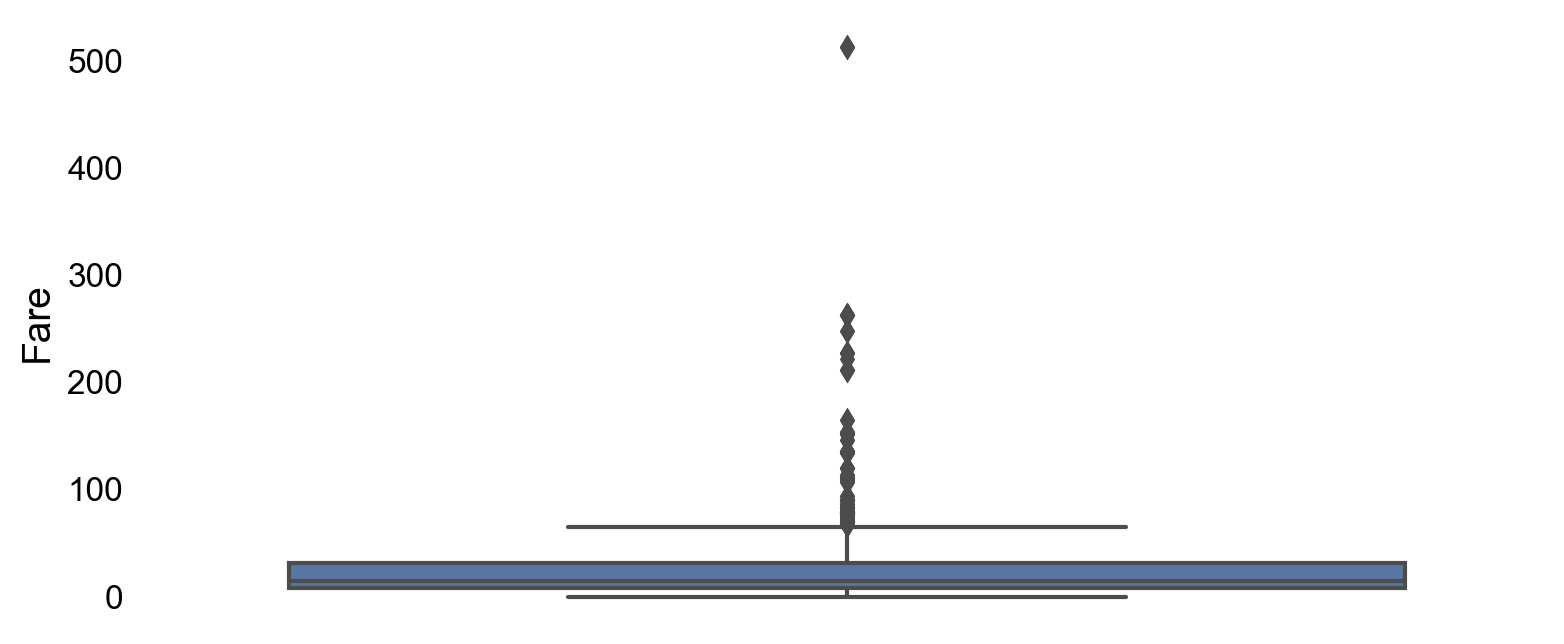

In [104]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = 'Fare', data = titanic)

<AxesSubplot:ylabel='Age'>

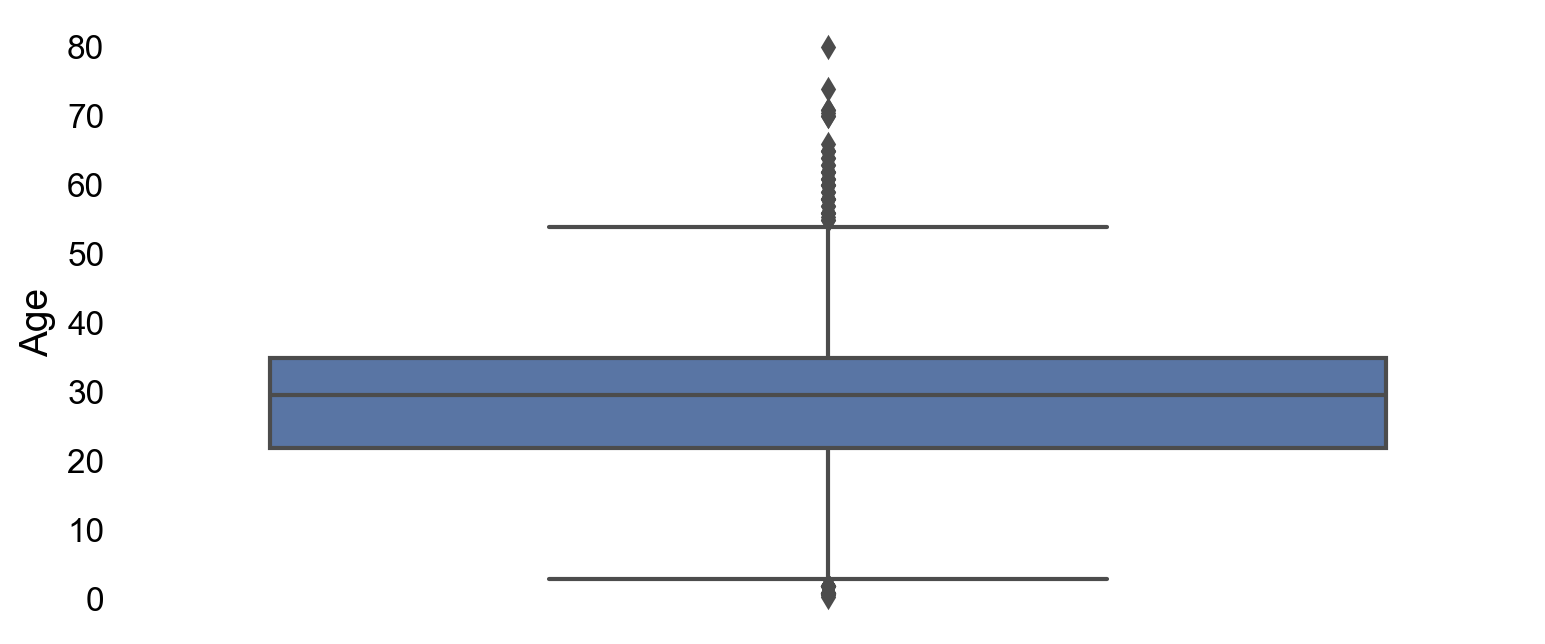

In [103]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(y = 'Age', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

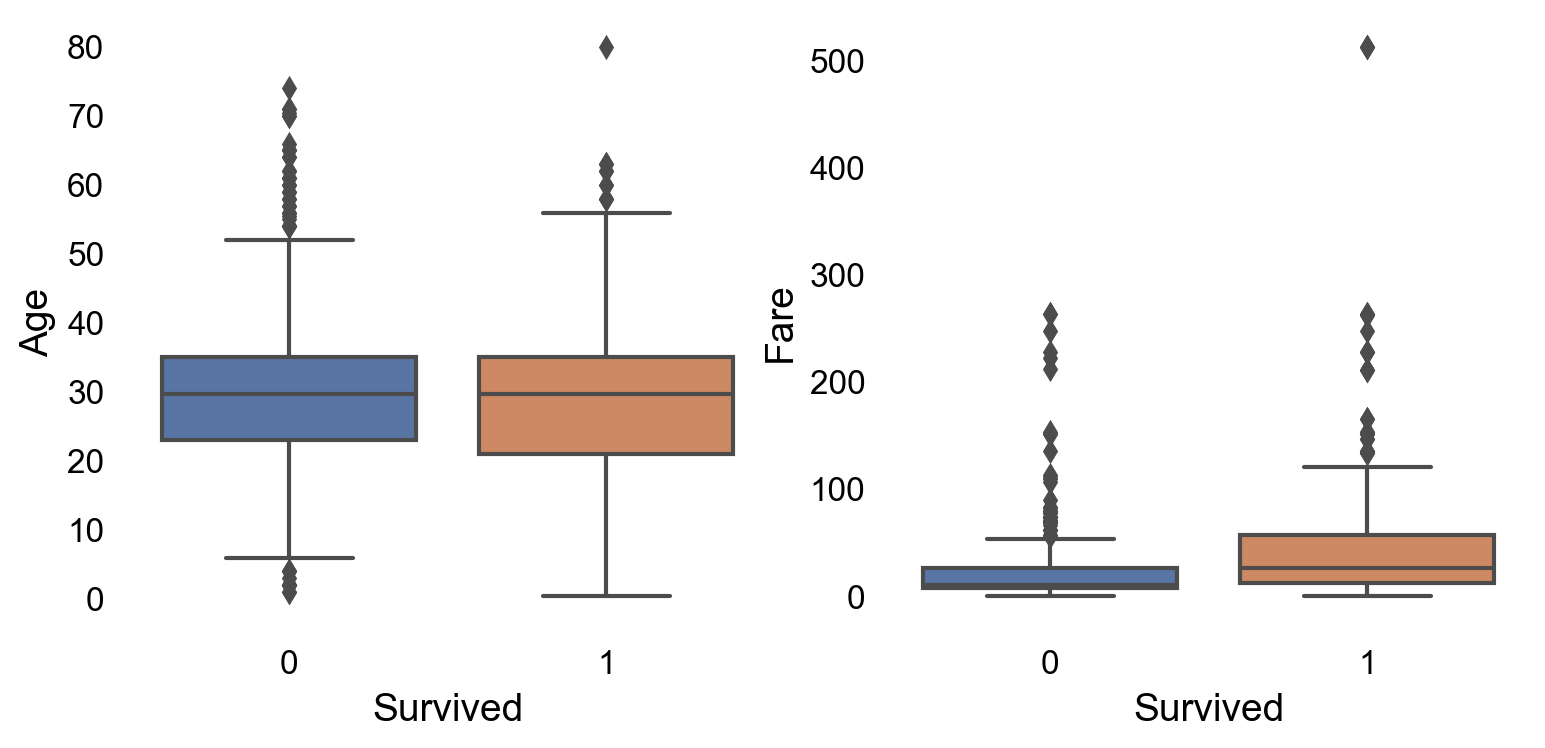

In [125]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.boxplot(x = 'Survived',y = 'Age', data = titanic)
p2 = fig.add_subplot(1,2,2)
sns.boxplot(x = 'Survived',y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

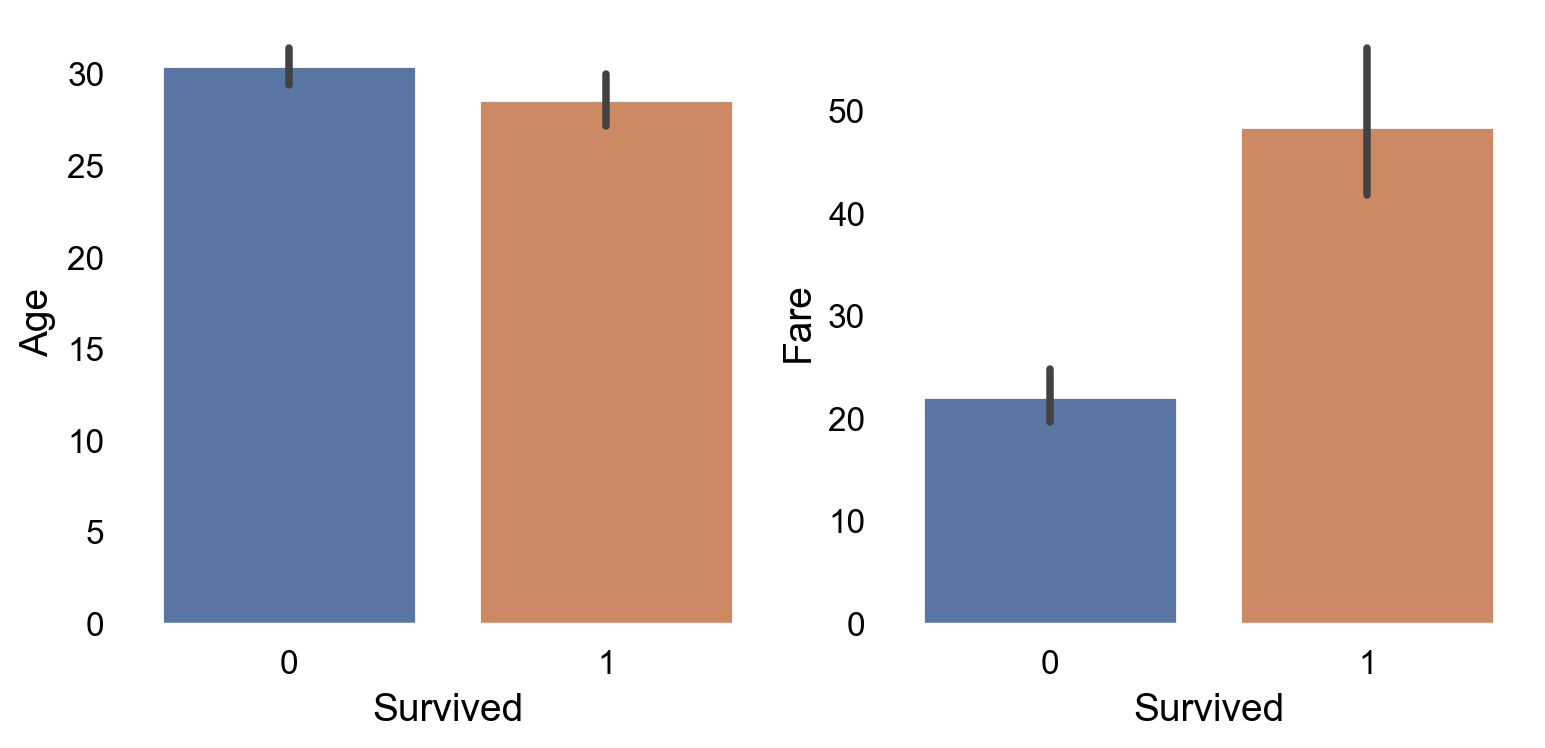

In [124]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'Survived',y = 'Age', data = titanic)
p2 = fig.add_subplot(1,2,2)
sns.barplot(x = 'Survived',y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

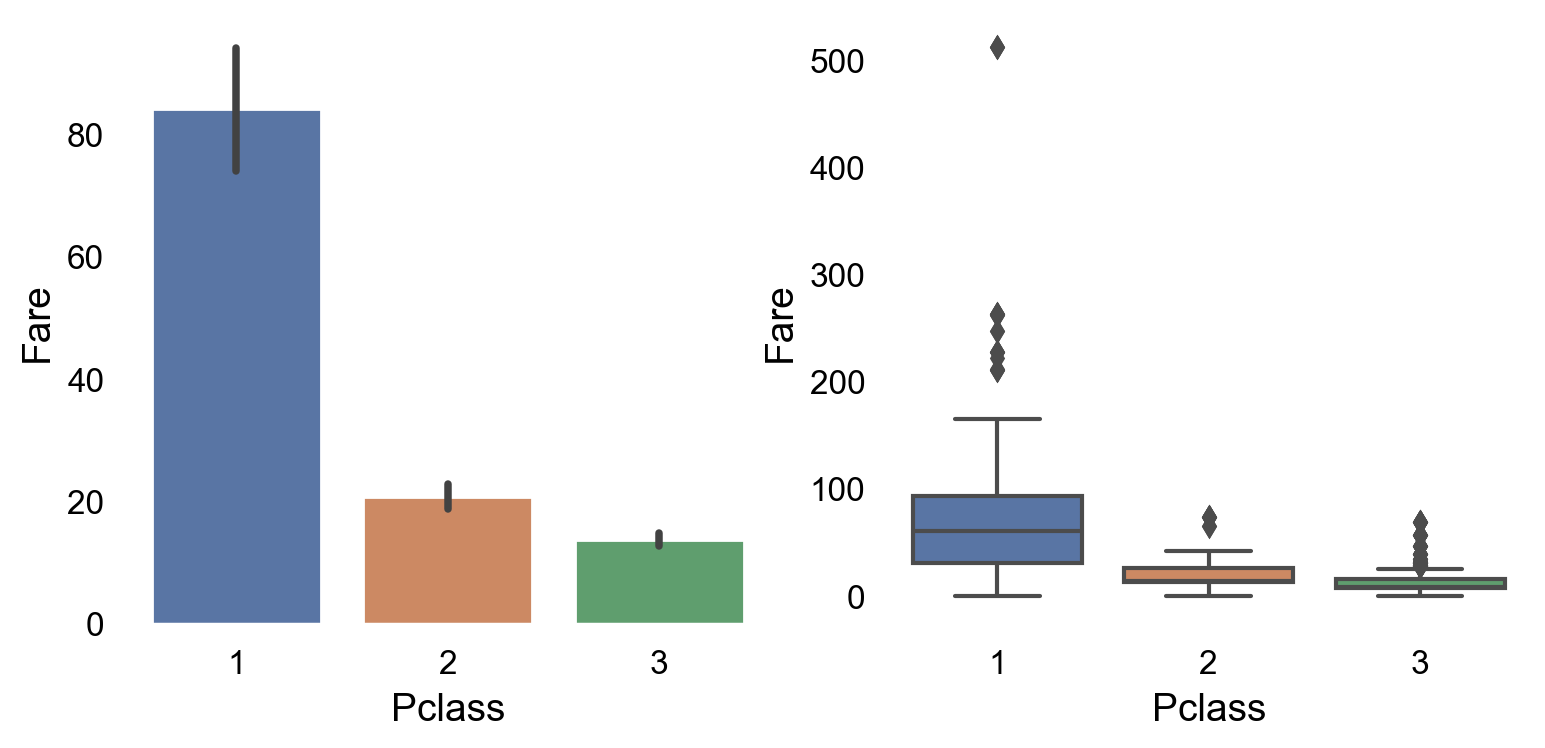

In [126]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'Pclass',y = 'Fare', data = titanic)
p2 = fig.add_subplot(1,2,2)
sns.boxplot(x = 'Pclass',y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

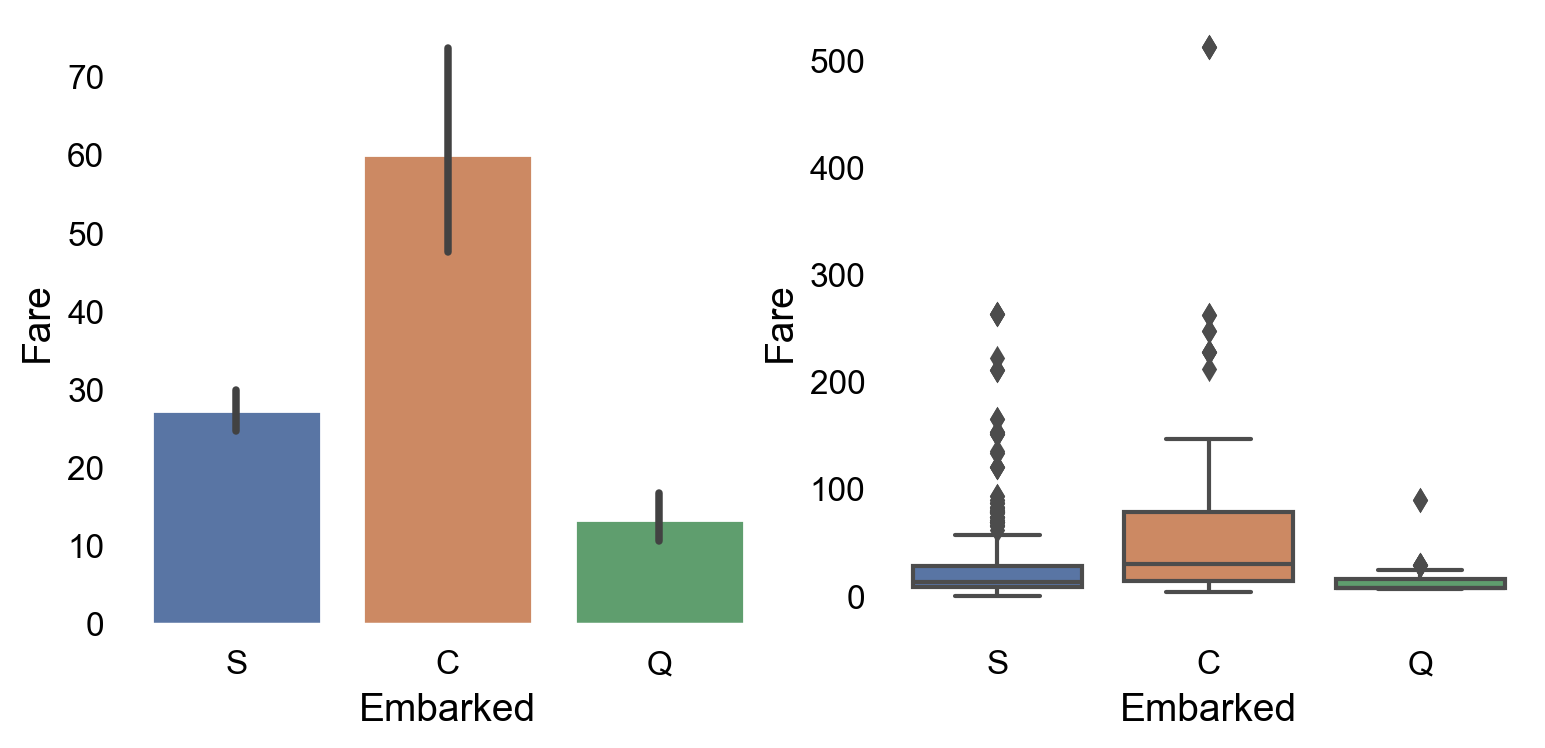

In [122]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'Embarked',y = 'Fare', data = titanic)
p2 = fig.add_subplot(1,2,2)
sns.boxplot(x = 'Embarked',y = 'Fare', data = titanic)


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

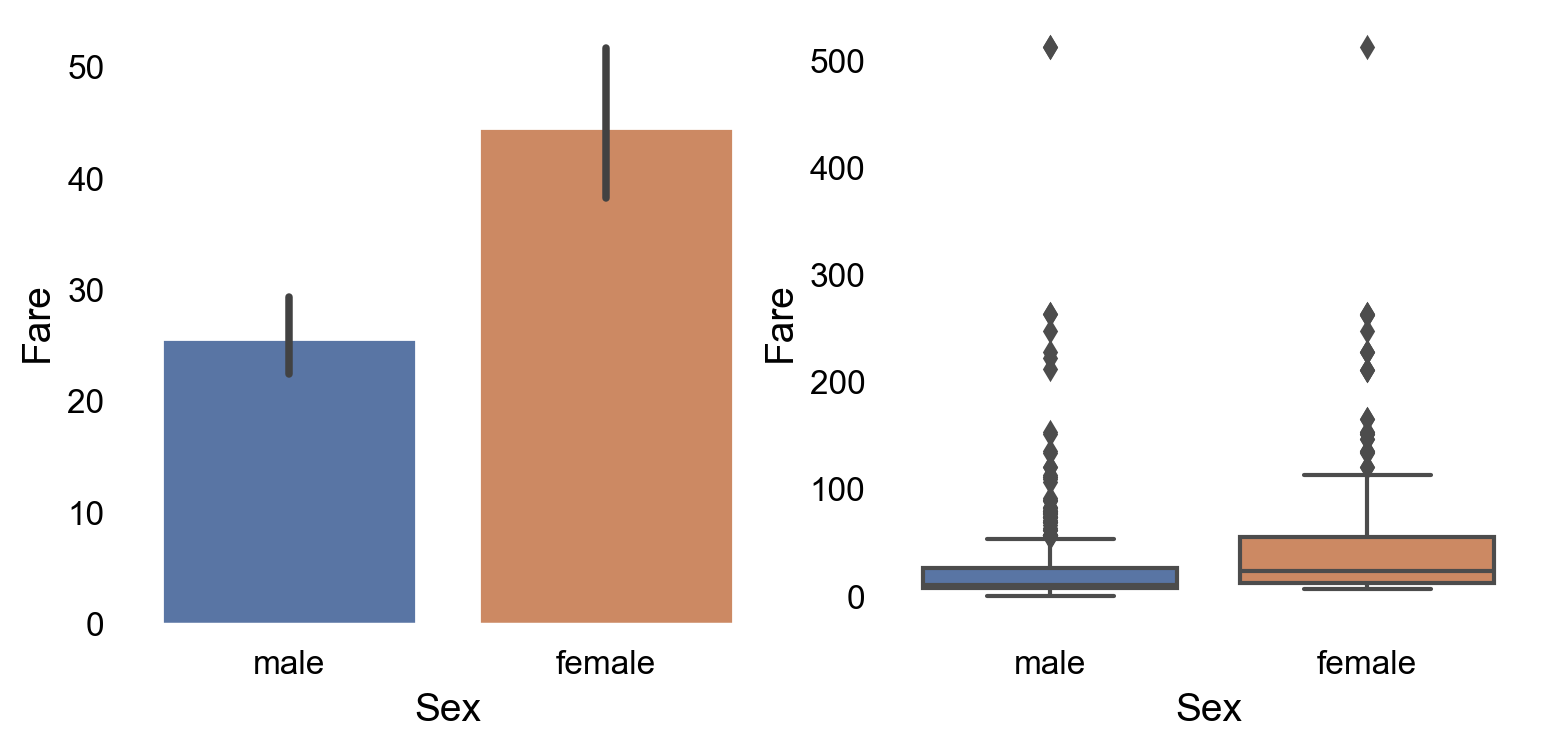

In [127]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'Sex',y = 'Fare', data = titanic)
p2 = fig.add_subplot(1,2,2)
sns.boxplot(x = 'Sex',y = 'Fare', data = titanic)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

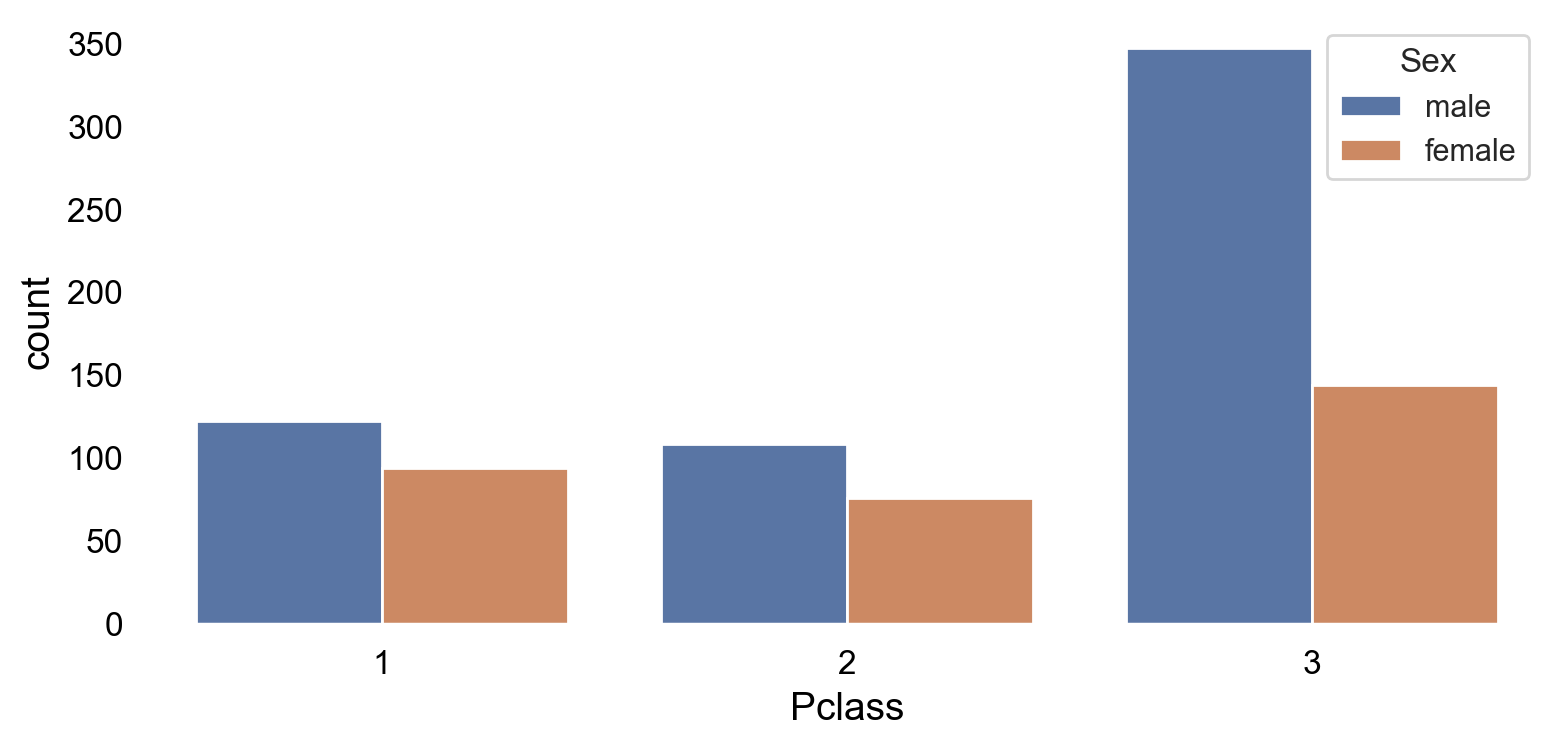

In [128]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Pclass', hue = 'Sex', data = titanic)